In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

### Dataset preview

Dataset consists of 636 images in two resolutions: 1280x720 and 1080x1920. The quality of images varies, which might help better generalization. Let's examine few:
Clearly, the ball occupies a very small chunk in the pictures, which makes the training process even harder. In COCO dataset objects usually occupy more than 50% of the images, here the ball occupies merely 20 pixels.

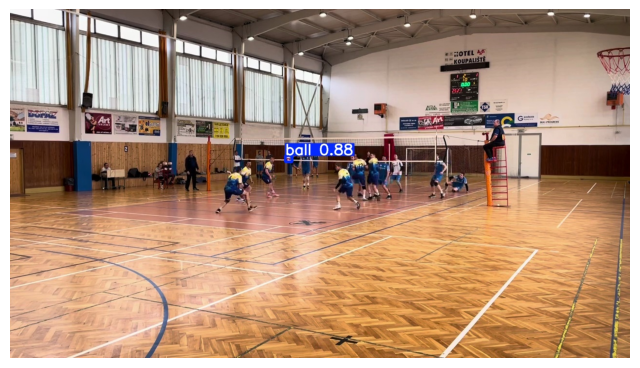

In [2]:
ex1 = Image.open('assets/ex1.jpg')
ex2 = Image.open('assets/detail.jpg')
mobile = Image.open('assets/mobile.jpg')

def imshow(img):
    plt.figure(figsize=(8,8), dpi=100)
    plt.imshow(img)
    plt.axis('off')    

imshow(ex1)

Here we can see that the ball in the upper right corner is as small as 10x10 pixels:

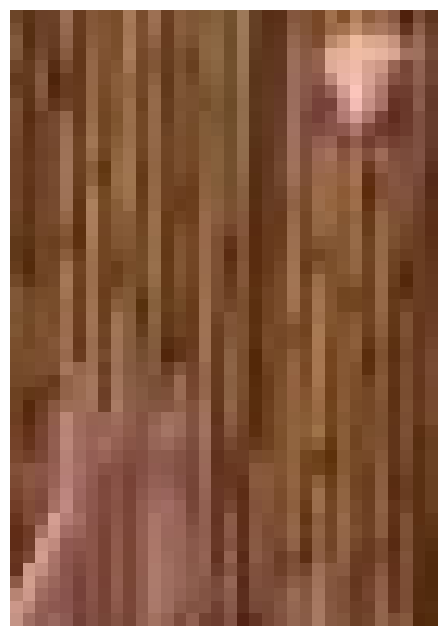

In [3]:
imshow(ex2)

To compensate for the lower quality pictures, higher resolution images were added. Here the ball occupies about 30 pixels however due to different aspect ratio and method which YOLO models use to preprocess input images I suspect the bigger ball should not affect the precision of models.

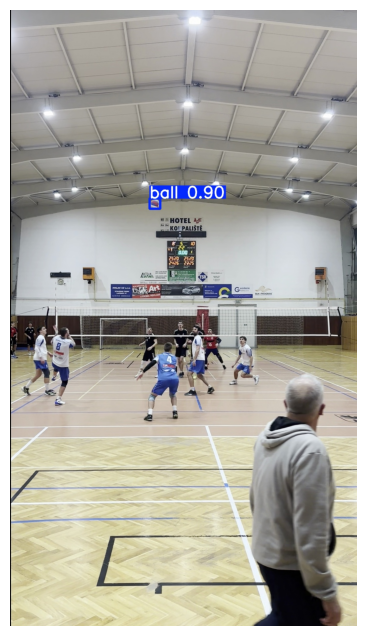

In [4]:
imshow(mobile)

### YOLO input preprocess

YOLO model is specified by `imgsz` parameter as an input size for an image. The image is preprocessed using so-called letterboxing. Image is resized so the longer side is `imgsz` and is padded with grey color, aspect ratio is kept. This will shrink the image even more and thus harder and the model has to learn only few pixels. Example of letterboxing is shown below:

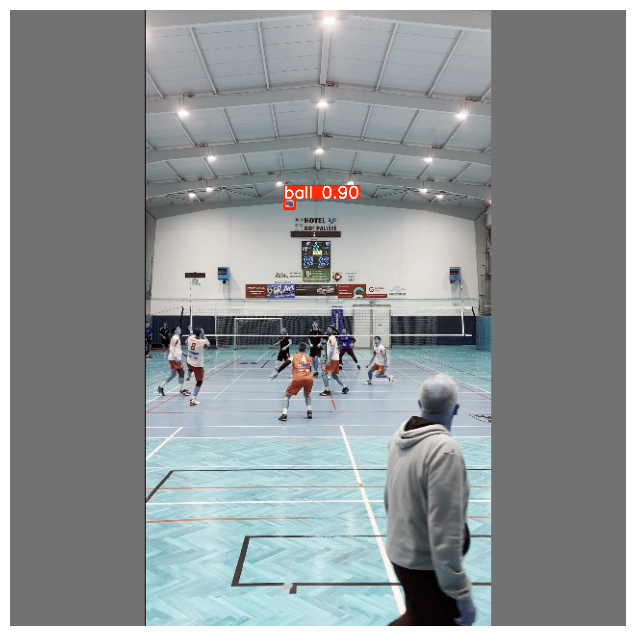

In [5]:
from ultralytics.data.augment import LetterBox
import cv2

i = cv2.imread('assets/mobile.jpg')
lb = LetterBox()

imshow(lb(image=i))